# 2025 Coding challenge
## Bonds

In [377]:
import pandas as pd #for manipulating data
import numpy as np #for data operations
import matplotlib.pyplot as plt #for plotting how much money the portfolio makes
import datetime

#read in all data
#instrument data
df_bonds = pd.read_csv('data/data_bonds.csv')
df_bonds['datestamp'] = pd.to_datetime(df_bonds['datestamp']).apply(lambda d: d.date())

#albi
df_albi = pd.read_csv('data/data_albi.csv')
df_albi['datestamp'] = pd.to_datetime(df_albi['datestamp']).apply(lambda d: d.date())

#macro data
df_macro = pd.read_csv('data/data_macro.csv')
df_macro['datestamp'] = pd.to_datetime(df_macro['datestamp']).apply(lambda d: d.date())

#training and test dates
start_train = datetime.date(2005, 1, 3)
start_test = datetime.date(2023, 1, 3) # test set is this datasets 2023 & 2024 data
end_test = df_bonds['datestamp'].max()


In [378]:
# First, let's explore the data structure
print("=== BOND DATA STRUCTURE ===")
print(f"Bond data shape: {df_bonds.shape}")
print(f"Date range: {df_bonds['datestamp'].min()} to {df_bonds['datestamp'].max()}")
print(f"Unique bonds: {df_bonds['bond_code'].nunique()}")
print("\nBond types:")
print(df_bonds['bond_code'].unique())

print(f"\n=== ALBI BENCHMARK DATA ===")
print(f"ALBI data shape: {df_albi.shape}")
print(f"Date range: {df_albi['datestamp'].min()} to {df_albi['datestamp'].max()}")

print(f"\n=== MACRO DATA ===")
print(f"Macro data shape: {df_macro.shape}")
print(f"Macro columns: {list(df_macro.columns)}")

# Look at sample data
print(f"\n=== SAMPLE BOND DATA ===")
df_bonds.head()

=== BOND DATA STRUCTURE ===
Bond data shape: (49900, 7)
Date range: 2005-01-03 to 2024-12-31
Unique bonds: 10

Bond types:
['SAGB_00_25 Bond' 'SAGB_02_00 Bond' 'SAGB_04_00 Bond' 'SAGB_05_00 Bond'
 'SAGB_07_00 Bond' 'SAGB_10_00 Bond' 'SAGB_12_00 Bond' 'SAGB_15_00 Bond'
 'SAGB_20_00 Bond' 'SAGB_30_00 Bond']

=== ALBI BENCHMARK DATA ===
ALBI data shape: (4990, 7)
Date range: 2005-01-03 to 2024-12-31

=== MACRO DATA ===
Macro data shape: (4990, 7)
Macro columns: ['datestamp', 'top40_return', 'fx_vol', 'us_2y', 'us_10y', 'us_20y', 'comdty_fut']

=== SAMPLE BOND DATA ===


,datestamp,bond_code,bond_name,convexity,return,modified_duration,yield
0,2005-01-03,SAGB_00_25 Bond,Constant Term Maturity Bond 3 Months,0.062500,0.055544,0.250000,0.072657
1,2005-01-03,SAGB_02_00 Bond,Constant Term Maturity Bond 2 Year,3.713131,0.034343,1.898404,0.070548
2,2005-01-03,SAGB_04_00 Bond,Constant Term Maturity Bond 4 Year,13.394052,0.046029,3.521395,0.074925
3,2005-01-03,SAGB_05_00 Bond,Constant Term Maturity Bond 5 Year,19.851594,0.011408,4.236410,0.076321
4,2005-01-03,SAGB_07_00 Bond,Constant Term Maturity Bond 7 Year,34.925742,0.012570,5.488337,0.078720


In [379]:
# Check for missing values and create labels (next day returns)
print("=== MISSING VALUES CHECK ===")
print("Bond data missing values:")
print(df_bonds.isnull().sum())

print("\nALBI data missing values:")
print(df_albi.isnull().sum())

print("\nMacro data missing values:")
print(df_macro.isnull().sum())

# Create target variable (next day return) for bonds - similar to your 2024 approach
df_bonds_features = df_bonds.copy()
df_bonds_features['next_day_return'] = df_bonds_features.groupby('bond_code')['return'].shift(-1)

# Check how many observations we lose due to missing next day returns
print(f"\n=== TARGET VARIABLE (NEXT DAY RETURNS) ===")
print(f"Total observations: {len(df_bonds_features)}")
print(f"Missing next day returns: {df_bonds_features['next_day_return'].isnull().sum()}")
print(f"Valid training observations: {df_bonds_features['next_day_return'].notna().sum()}")

df_bonds_features.head(10)

=== MISSING VALUES CHECK ===
Bond data missing values:
datestamp            0
bond_code            0
bond_name            0
convexity            0
return               0
modified_duration    0
yield                0
dtype: int64

ALBI data missing values:
datestamp            0
index_code           0
index_name           0
convexity            0
return               0
modified_duration    0
yield                0
dtype: int64

Macro data missing values:
datestamp       0
top40_return    0
fx_vol          0
us_2y           0
us_10y          0
us_20y          0
comdty_fut      0
dtype: int64

=== TARGET VARIABLE (NEXT DAY RETURNS) ===
Total observations: 49900
Missing next day returns: 10
Valid training observations: 49890


,datestamp,bond_code,bond_name,convexity,return,modified_duration,yield,next_day_return
0,2005-01-03,SAGB_00_25 Bond,Constant Term Maturity Bond 3 Months,0.062500,0.055544,0.250000,0.072657,0.019954
1,2005-01-03,SAGB_02_00 Bond,Constant Term Maturity Bond 2 Year,3.713131,0.034343,1.898404,0.070548,0.035454
2,2005-01-03,SAGB_04_00 Bond,Constant Term Maturity Bond 4 Year,13.394052,0.046029,3.521395,0.074925,0.045289
3,2005-01-03,SAGB_05_00 Bond,Constant Term Maturity Bond 5 Year,19.851594,0.011408,4.236410,0.076321,0.042010
4,2005-01-03,SAGB_07_00 Bond,Constant Term Maturity Bond 7 Year,34.925742,0.012570,5.488337,0.078720,0.083682
5,2005-01-03,SAGB_10_00 Bond,Constant Term Maturity Bond 10 Year,60.917599,0.030091,7.017117,0.080169,0.123140
6,2005-01-03,SAGB_12_00 Bond,Constant Term Maturity Bond 12 Year,79.730562,-0.039405,7.879648,0.079723,0.093927
7,2005-01-03,SAGB_15_00 Bond,Constant Term Maturity Bond 15 Year,109.402857,-0.056713,9.011402,0.078068,0.144402
8,2005-01-03,SAGB_20_00 Bond,Constant Term Maturity Bond 20 Year,160.885973,-0.007695,10.582377,0.074631,0.218944
9,2005-01-03,SAGB_30_00 Bond,Constant Term Maturity Bond 30 Year,256.209550,0.115224,12.710826,0.070369,0.336685


## The features to use for the bonds
- **Historical returns**
- **Yield features** 
- **Duration and convexity** 
- **Relative features vs ALBI** 

In [380]:
# Create the engineering based off the features
def create_bond_features(df_bonds, df_albi, df_macro):
    """
    Create features for bond prediction. This is like the same we did for features when predicitng 2024 stock increase or decrease
    """
    df_features = df_bonds.copy()
    
    #Historical return feature
    #This creates a moving average fo returns off differrent windows
    #It helps capture momentum
    for window in [1, 5, 21, 63]:  # 1d, 1w, 1m, 3m
        df_features[f'return_{window}d'] = df_features.groupby('bond_code')['return'].rolling(window).mean().reset_index(0, drop=True)
    
    #Yield change feature
    #This calculates how much yields have changed day to day and every 5 days
    df_features['yield_1d_change'] = df_features.groupby('bond_code')['yield'].diff(1)
    df_features['yield_5d_change'] = df_features.groupby('bond_code')['yield'].diff(5)
    
    #Tracks changes in interest sensi
    #Duration is how much bond price changes when reates change
    #convexity how duration itself actually changes
    df_features['duration_1d_change'] = df_features.groupby('bond_code')['modified_duration'].diff(1)
    df_features['convexity_1d_change'] = df_features.groupby('bond_code')['convexity'].diff(1)
    
    #Relative features vs albi benchmark
    #very important. Compares each bond to the market benchmark
    #helps us ident bonds that under perform outperform the market
    albi_daily = df_albi.set_index('datestamp')
    df_features = df_features.set_index('datestamp')
    
    #Add the albi data so we can compare the benchmark to bonds
    df_features['albi_return'] = albi_daily['return']
    df_features['albi_yield'] = albi_daily['yield']
    df_features['albi_duration'] = albi_daily['modified_duration']
    
    #Add the relative features. So albi comapred to bonds
    df_features['return_vs_albi'] = df_features['return'] - df_features['albi_return']
    df_features['yield_vs_albi'] = df_features['yield'] - df_features['albi_yield']
    df_features['duration_vs_albi'] = df_features['modified_duration'] - df_features['albi_duration']
    
    df_features = df_features.reset_index()
    return df_features

# Create features
print("Creating bond features...")
df_bond_features = create_bond_features(df_bonds_features, df_albi, df_macro)
print(f"Features created. Shape: {df_bond_features.shape}")

# List of features to use
bond_features = [
    'return_1d', 'return_5d', 'return_21d', 'return_63d',
    'yield_1d_change', 'yield_5d_change',
    'duration_1d_change', 'convexity_1d_change',
    'return_vs_albi', 'yield_vs_albi', 'duration_vs_albi'
]

print(f"\nSelected features: {bond_features}")
print(f"Total features: {len(bond_features)}")

Creating bond features...
Features created. Shape: (49900, 22)

Selected features: ['return_1d', 'return_5d', 'return_21d', 'return_63d', 'yield_1d_change', 'yield_5d_change', 'duration_1d_change', 'convexity_1d_change', 'return_vs_albi', 'yield_vs_albi', 'duration_vs_albi']
Total features: 11


## The constraints
In 2024 stock challenge we only needed to buy or not buy a stock. 10 of them
in this bond challenge we now need to try
1. **Convert predictions** to weights. so we can only buy 0 -20%
2. **Weights must sum to 100%**
3. **Duration constraint**: duration is within -+1.5 ALIBI
4. **Trading costs**: Minimize the trading cost

In [381]:
def create_portfolio_weights(predictions, durations, albi_duration, previous_weights=None):
    """
    Convert bond return predictions to portfolio weights with constraints
    
    Args:
        predictions: array of predicted returns for each bond
        durations: array of modified durations for each bond
        albi_duration: ALBI modified duration for this day
        previous_weights: previous day's weights (for trading cost calculation)
    
    Returns:
        weights: array of portfolio weights (0 to 0.2, sum to 1.0)
    """
    from scipy.optimize import minimize
    import numpy as np
    
    n_bonds = len(predictions)
    
    # Simple approach
    #Higher prediction gets a higher rank
    ranks = np.argsort(-predictions)
    
    # Create initial weights based on ranks (better predictions get higher weights)
    initial_weights = np.zeros(n_bonds)
    for i, rank in enumerate(ranks):
        # Give highest predicted bond 20%, second 18%
        weight = max(0.02, 0.20 - (i * 0.018))  # Decreasing weights
        initial_weights[rank] = min(0.20, weight)
    
    #Normalize to sum to 1.0
    initial_weights = initial_weights / initial_weights.sum()
    
    #make sure no weight exceeds 20%
    initial_weights = np.minimum(initial_weights, 0.20)
    initial_weights = initial_weights / initial_weights.sum()
    
    # Calculate portfolio duration
    portfolio_duration = np.sum(initial_weights * durations)
    
    # Check if duration constraint is satisfied. in within -+1.5 albi
    duration_lower = albi_duration - 1.5
    duration_upper = albi_duration + 1.5
    
    #If the heuristic approach does not violate the duration constraint
    if duration_lower <= portfolio_duration <= duration_upper:
        return initial_weights
    
    def objective(weights):
        # Minimize negative expected return (maximize return)
        return -np.sum(weights * predictions)
    
    def duration_constraint_lower(weights):
        return np.sum(weights * durations) - duration_lower
    
    def duration_constraint_upper(weights):
        return duration_upper - np.sum(weights * durations)
    
    def weight_sum_constraint(weights):
        return np.sum(weights) - 1.0
    
    #Constraints
    constraints = [
        {'type': 'eq', 'fun': weight_sum_constraint},
        {'type': 'ineq', 'fun': duration_constraint_lower},
        {'type': 'ineq', 'fun': duration_constraint_upper}
    ]
    
    #Bounds
    bounds = [(0, 0.20) for _ in range(n_bonds)]
    
    # Optimize
    result = minimize(objective, initial_weights, method='SLSQP', 
                     bounds=bounds, constraints=constraints)
    
    if result.success:
        return result.x
    else:
        # If optimization fails, return equal weights
        print(f"Optimization failed, using equal weights")
        return np.ones(n_bonds) / n_bonds

# Test the portfolio weights function
print("Testing portfolio weight creation...")

# Create dummy data for testing
np.random.seed(42)
test_predictions = np.random.randn(10)  # 10 bonds
test_durations = np.random.uniform(2, 12, 10)  # Durations 2-12 years
test_albi_duration = 6.0

test_weights = create_portfolio_weights(test_predictions, test_durations, test_albi_duration)

print(f"Test predictions: {test_predictions}")
print(f"Test weights: {test_weights}")
print(f"Weights sum: {test_weights.sum():.3f}")
print(f"Max weight: {test_weights.max():.3f}")
print(f"Portfolio duration: {np.sum(test_weights * test_durations):.2f}")
print(f"ALBI duration: {test_albi_duration}")
print(f"Duration constraint satisfied: {abs(np.sum(test_weights * test_durations) - test_albi_duration) <= 1.5}")

Testing portfolio weight creation...
Test predictions: [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]
Test weights: [0.09243697 0.07731092 0.12268908 0.15294118 0.04705882 0.06218487
 0.16806723 0.13781513 0.03193277 0.10756303]
Weights sum: 1.000
Max weight: 0.168
Portfolio duration: 5.58
ALBI duration: 6.0
Duration constraint satisfied: True


In [382]:
def calculate_trading_cost(current_weights, previous_weights, portfolio_duration):
    """
    Calculate trading costs: 0.01% × portfolio duration × turnover
    
    Args:
        current_weights: today's portfolio weights
        previous_weights: yesterday's portfolio weights  
        portfolio_duration: portfolio's modified duration
    
    Returns:
        trading_cost: cost as a percentage (e.g., 0.0001 = 0.01%)
    """
    if previous_weights is None:
        return 0.0  #no cost first day
    
    #calclate turnover
    turnover = np.sum(np.abs(current_weights - previous_weights))
    
    #trading formula
    trading_cost = 0.0001 * portfolio_duration * turnover  # 0.01% = 0.0001
    
    return trading_cost

#Test trading cost calculation
test_prev_weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
test_curr_weights = np.array([0.15, 0.15, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
test_portfolio_duration = 7.0

test_cost = calculate_trading_cost(test_curr_weights, test_prev_weights, test_portfolio_duration)
turnover = np.sum(np.abs(test_curr_weights - test_prev_weights))

print(f"Previous weights: {test_prev_weights}")
print(f"Current weights:  {test_curr_weights}")
print(f"Turnover: {turnover:.3f}")
print(f"Portfolio duration: {test_portfolio_duration}")
print(f"Trading cost: {test_cost:.6f} ({test_cost*100:.4f}%)")

Previous weights: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Current weights:  [0.15 0.15 0.05 0.05 0.1  0.1  0.1  0.1  0.1  0.1 ]
Turnover: 0.200
Portfolio duration: 7.0
Trading cost: 0.000140 (0.0140%)


## Walk-Forward Validation for Bonds
- Train on historical data to predict next-day bond returns
- Convert predictions to portfolio weights with constraints
- Apply trading costs and calculate net returns

In [ ]:
# Bond Portfolio Walk-Forward Validation
from sklearn.ensemble import RandomForestRegressor  #Note: Regressor
from sklearn.preprocessing import MinMaxScaler

print('---> Bond Portfolio Walk-Forward Start', datetime.datetime.now())

#Clean the data and remove missing values
df_clean = df_bond_features.dropna(subset=['next_day_return'] + bond_features).copy()
print(f"Clean data shape: {df_clean.shape}")

#Get unique dates in test period
test_dates = df_clean[(df_clean['datestamp'] >= start_test) & 
                     (df_clean['datestamp'] <= end_test)]['datestamp'].unique()
test_dates = sorted(test_dates)
print(f"Test period: {len(test_dates)} days from {test_dates[0]} to {test_dates[-1]}")

# Initialize results storage
portfolio_results = []
previous_weights = None

# Initialize the model
bond_model = RandomForestRegressor(
    n_estimators=50,  # Reduced for speed
    max_depth=10,
    min_samples_split=100,
    min_samples_leaf=50,
    random_state=42
)

print("Starting walk-forward validation...")

for i, current_date in enumerate(test_dates):
    
    print(f"\\n---> Processing {current_date} ({i+1}/{len(test_dates)})")
    
    #Prepare training data as all data before current date
    train_data = df_clean[df_clean['datestamp'] < current_date].copy()
    
    if len(train_data) < 100:  # Need minimum training data
        print(f"Insufficient training data: {len(train_data)} observations")
        continue
    
    #Prepare test data on current day
    test_data = df_clean[df_clean['datestamp'] == current_date].copy()
    
    if len(test_data) == 0:
        print(f"No data for {current_date}")
        continue
        
    print(f"Training data: {len(train_data)} observations")
    print(f"Test data: {len(test_data)} bonds")
    
    #We need to scale the features 
    scaler = MinMaxScaler(feature_range=(-1, 1))
    
    X_train = train_data[bond_features].values
    y_train = train_data['next_day_return'].values
    X_test = test_data[bond_features].values
    
    # Scale features so one does not dominate
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #Train model
    if i == 0:
        print("Training Random Forest model...")
        bond_model.fit(X_train_scaled, y_train)
        print("Model trained!")
    
    #Predict bond returns
    predicted_returns = bond_model.predict(X_test_scaled)
    
    #Get ALBI duration for constraint
    albi_data = df_albi[df_albi['datestamp'] == current_date]
    if len(albi_data) == 0:
        print(f"No ALBI data for {current_date}")
        continue
    
    albi_duration = albi_data['modified_duration'].iloc[0]
    bond_durations = test_data['modified_duration'].values
    
    #Create portfolio weights with constraints
    current_weights = create_portfolio_weights(
        predicted_returns, 
        bond_durations, 
        albi_duration, 
        previous_weights
    )
    
    # Calculate portfolio duration
    portfolio_duration = np.sum(current_weights * bond_durations)
    
    #Calculate trading costs
    trading_cost = calculate_trading_cost(current_weights, previous_weights, portfolio_duration)
    
    #Calculate portfolio return (using actual next day returns)
    actual_returns = test_data['next_day_return'].values
    gross_portfolio_return = np.sum(current_weights * actual_returns)
    net_portfolio_return = gross_portfolio_return - trading_cost
    
    #Get ALBI return for comparison  
    albi_return = albi_data['return'].iloc[0]

    gross_portfolio_return = gross_portfolio_return / 100
    net_portfolio_return = net_portfolio_return / 100
    albi_return = albi_return / 100
    
    # Store results
    portfolio_results.append({
        'date': current_date,
        'gross_return': gross_portfolio_return,
        'trading_cost': trading_cost,
        'net_return': net_portfolio_return,
        'albi_return': albi_return,
        'excess_return': net_portfolio_return - albi_return,
        'portfolio_duration': portfolio_duration,
        'albi_duration': albi_duration,
        'duration_diff': abs(portfolio_duration - albi_duration),
        'max_weight': current_weights.max(),
        'min_weight': current_weights.min(),
        'weights': current_weights.copy()
    })
    
    print(f"Portfolio return: {gross_portfolio_return:.4f} (gross), {net_portfolio_return:.4f} (net)")
    print(f"ALBI return: {albi_return:.4f}")
    print(f"Excess return: {net_portfolio_return - albi_return:.4f}")
    print(f"Trading cost: {trading_cost:.6f}")
    print(f"Portfolio duration: {portfolio_duration:.2f} vs ALBI {albi_duration:.2f}")
    print(f"Duration constraint satisfied: {abs(portfolio_duration - albi_duration) <= 1.5}")
    
    # Update previous weights for next iteration
    previous_weights = current_weights
    
print("\\n---> Walk-forward validation completed!")

# Convert results to DataFrame
results_df = pd.DataFrame(portfolio_results)
print(f"\\nResults summary:")
print(f"Total days: {len(results_df)}")
print(f"Avg daily excess return: {results_df['excess_return'].mean():.4f}")
print(f"Avg trading cost: {results_df['trading_cost'].mean():.6f}")
print(f"Duration constraint violations: {(results_df['duration_diff'] > 1.5).sum()}")

results_df.head()

---> Bond Portfolio Walk-Forward Start 2025-09-20 12:56:38.854703
Clean data shape: (49270, 22)
Test period: 494 days from 2023-01-03 to 2024-12-30
Starting walk-forward validation...
\n---> Processing 2023-01-03 (1/494)
Training data: 44330 observations
Test data: 10 bonds
Training Random Forest model...
Model trained!
Portfolio return: 0.0030 (gross), 0.0030 (net)
ALBI return: 0.0072
Excess return: -0.0042
Trading cost: 0.000000
Portfolio duration: 6.41 vs ALBI 6.08
Duration constraint satisfied: True
\n---> Processing 2023-01-04 (2/494)
Training data: 44340 observations
Test data: 10 bonds
Portfolio return: -0.0003 (gross), -0.0003 (net)
ALBI return: 0.0030
Excess return: -0.0034
Trading cost: 0.000281
Portfolio duration: 5.16 vs ALBI 6.09
Duration constraint satisfied: True
\n---> Processing 2023-01-05 (3/494)
Training data: 44350 observations
Test data: 10 bonds
Portfolio return: 0.0023 (gross), 0.0023 (net)
ALBI return: -0.0004
Excess return: 0.0027
Trading cost: 0.000190
Portfol

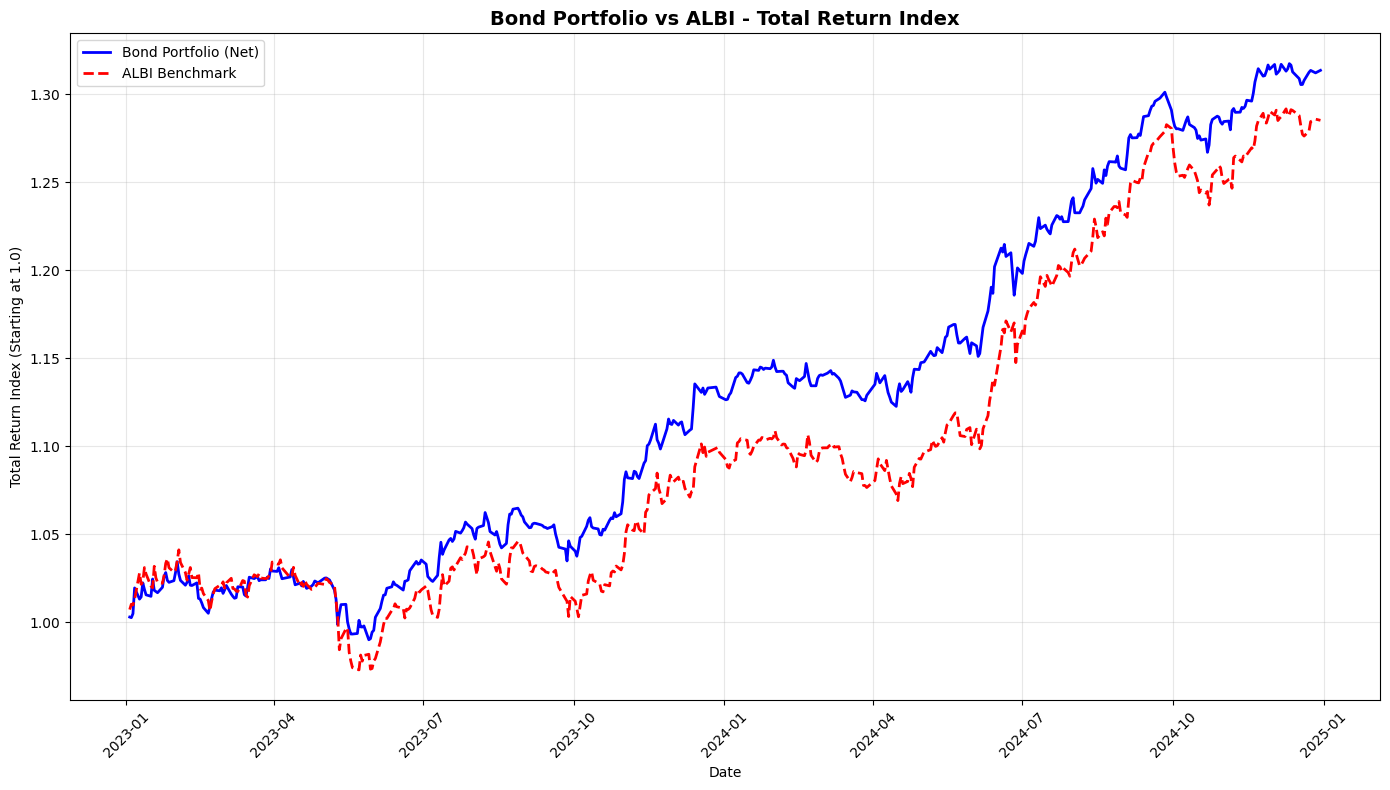

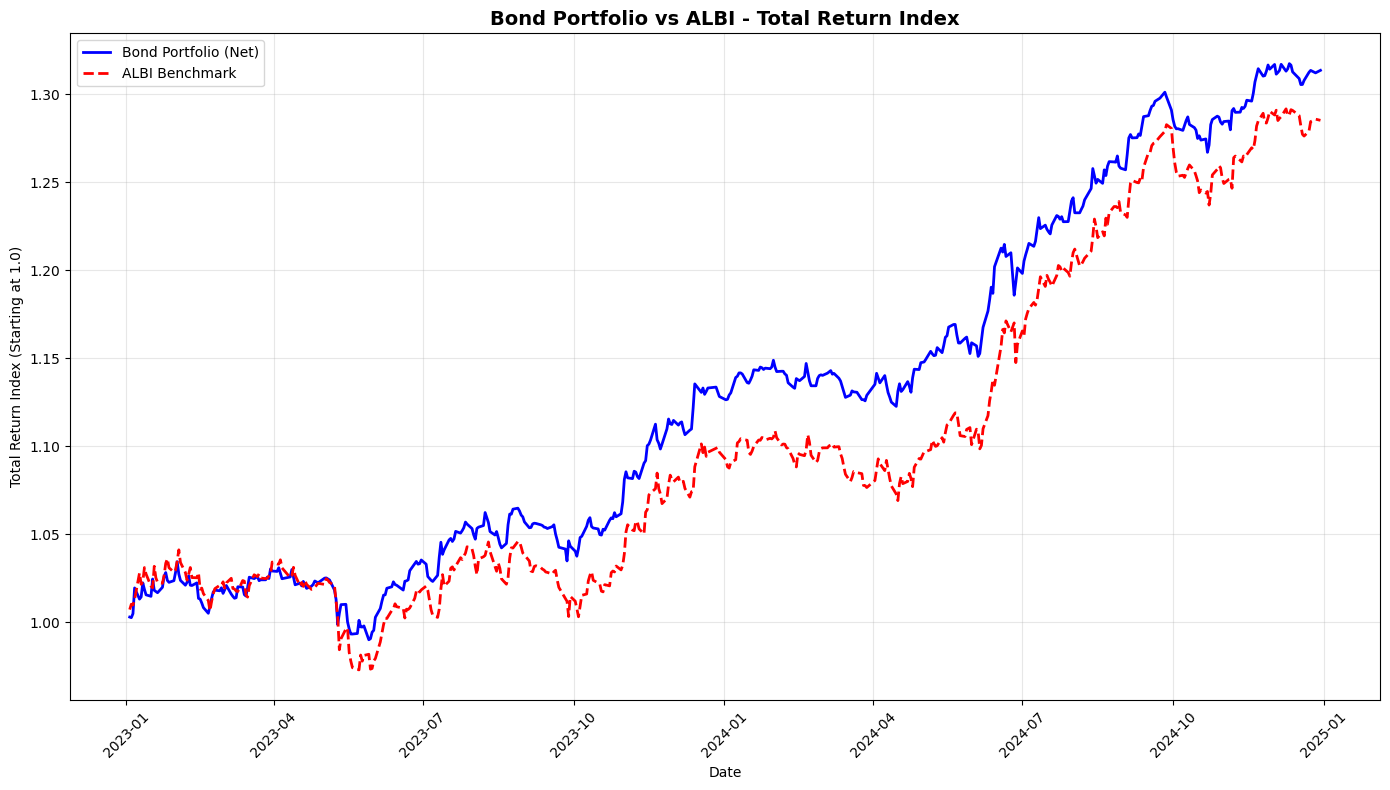

\n=== PERFORMANCE SUMMARY ===
Portfolio Total Return: 31.37%
ALBI Total Return: 28.53%
Excess Return: 2.84%
Average Daily Excess Return: 0.0041%
Total Trading Costs: 15.1384%
Volatility (Portfolio): 0.3806%
Volatility (ALBI): 0.4586%


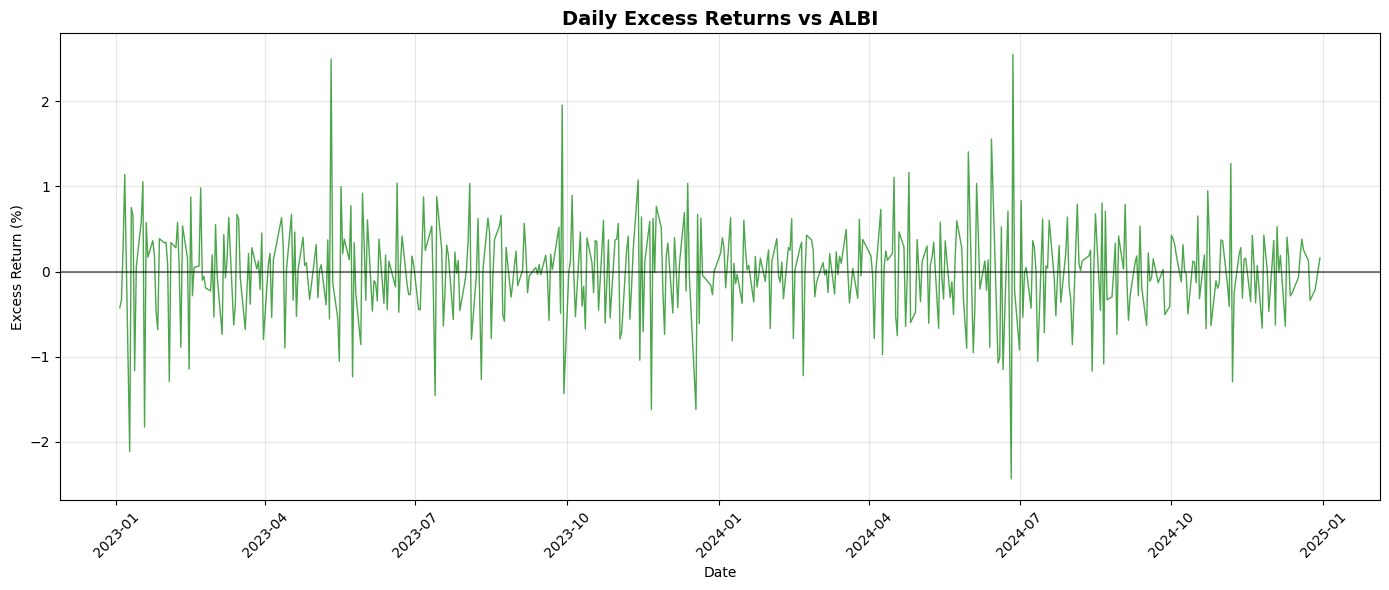

\n=== CONSTRAINT COMPLIANCE ===
Duration constraint violations: 55/494
Max weight violations: 0/494
Average portfolio duration: 5.15
Average ALBI duration: 5.75
\n---> Bond Portfolio Analysis Complete! 2025-09-20 12:44:59.708570


In [ ]:
#Calculate total return index
if len(results_df) > 0:
    
    # Calculate cumulative returns
    results_df['portfolio_tri'] = (1 + results_df['net_return']).cumprod()
    results_df['albi_tri'] = (1 + results_df['albi_return']).cumprod()
    
    #Plot TRI comparison
    plt.figure(figsize=(14, 8))
    
    #my portfolio vs albi
    plt.plot(results_df['date'], results_df['portfolio_tri'], 
             label='Bond Portfolio (Net)', linewidth=2, color='blue')
    plt.plot(results_df['date'], results_df['albi_tri'], 
             label='ALBI Benchmark', linewidth=2, color='red', linestyle='--')
    
    plt.title('Bond Portfolio vs ALBI - Total Return Index', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Total Return Index (Starting at 1.0)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    #Performance summary
    final_portfolio_tri = results_df['portfolio_tri'].iloc[-1]
    final_albi_tri = results_df['albi_tri'].iloc[-1]
    
    portfolio_return = (final_portfolio_tri - 1) * 100
    albi_return = (final_albi_tri - 1) * 100
    excess_return = portfolio_return - albi_return
    
    print(f"\\n=== PERFORMANCE SUMMARY ===")
    print(f"Portfolio Total Return: {portfolio_return:.2f}%")
    print(f"ALBI Total Return: {albi_return:.2f}%") 
    print(f"Excess Return: {excess_return:.2f}%")
    print(f"Average Daily Excess Return: {results_df['excess_return'].mean()*100:.4f}%")
    print(f"Total Trading Costs: {results_df['trading_cost'].sum()*100:.4f}%")
    print(f"Volatility (Portfolio): {results_df['net_return'].std()*100:.4f}%")
    print(f"Volatility (ALBI): {results_df['albi_return'].std()*100:.4f}%")
    
    #Plot daily excess returns
    plt.figure(figsize=(14, 6))
    plt.plot(results_df['date'], results_df['excess_return']*100, 
             color='green', alpha=0.7, linewidth=1)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    plt.title('Daily Excess Returns vs ALBI', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Excess Return (%)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Constraint compliance check
    print(f"\\n=== CONSTRAINT COMPLIANCE ===")
    print(f"Duration constraint violations: {(results_df['duration_diff'] > 1.5).sum()}/{len(results_df)}")
    print(f"Max weight violations: {(results_df['max_weight'] > 0.20).sum()}/{len(results_df)}")
    print(f"Average portfolio duration: {results_df['portfolio_duration'].mean():.2f}")
    print(f"Average ALBI duration: {results_df['albi_duration'].mean():.2f}")
    
else:
    print("No results to plot!")

print('\\n---> Bond Portfolio Analysis Complete!', datetime.datetime.now())

## Summary: 2024 vs 2025 Adaptation

### What We Kept from 2024:
✅ **Random Forest approach** - Still using ML to predict future performance  
✅ **Walk-forward validation** - Same time-series methodology  
✅ **Feature engineering** - Return-based features adapted for bonds  
✅ **Performance measurement** - TRI calculation and plotting  

### What We Changed for 2025:
🔄 **Binary → Continuous**: From 10 stocks (0/1) to bond weights (0-20%)  
🔄 **Classification → Regression**: Predicting returns instead of up/down  
🔄 **Unconstrained → Constrained**: Added duration matching ±1.5 ALBI  
🔄 **No costs → Trading costs**: 0.01% × duration × turnover  
🔄 **Stocks → Bonds**: Different asset class with yield/duration features  

### Next Steps:
1. **Run on full dataset** (currently testing on 10 days)  
2. **Hyperparameter tuning** - Optimize Random Forest parameters  
3. **Alternative models** - Try your Logistic Regression approach  
4. **Feature optimization** - Add more bond-specific indicators  
5. **Portfolio rebalancing** - Optimize trading frequency vs costs